In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,f1_score,mean_squared_error,confusion_matrix,ConfusionMatrixDisplay
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
data=pd.read_csv('/content/fetal_health classification project.csv')
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [8]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


## **Train the model using Support Vector Machine Algorithm (SVM)**

In [115]:
from sklearn.svm import SVC
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)


In [116]:
x_train,x_test,y_train,y_test=train_test_split(data.drop('fetal_health',axis=1),data['fetal_health'],test_size=0.2,random_state=42)

In [117]:
svm_model.fit(x_train,y_train)

SVC(random_state=42)

In [118]:
svm_model.score(x_train,y_train)

0.86

In [119]:
cv_scores=cross_val_score(svm_model,x_train,y_train,cv=5)
cv_scores

array([0.86470588, 0.85294118, 0.84411765, 0.82352941, 0.86764706])

In [120]:
y_pred_svm=svm_model.predict(x_test)

In [121]:
accuracy_score(y_test,y_pred_svm)

0.8568075117370892

In [122]:
f1_score(y_test,y_pred_svm,average='weighted')

0.8438323240518121

In [123]:
mean_squared_error(y_test,y_pred_svm)

0.19248826291079812

In [124]:
svm_model.fit(x_test,y_test)

SVC(random_state=42)

In [125]:
svm_model.score(x_test,y_test)

0.8145539906103286

In [126]:
confusion_matrix(y_test,y_pred_svm)

array([[321,  10,   2],
       [ 36,  26,   2],
       [  5,   6,  18]])

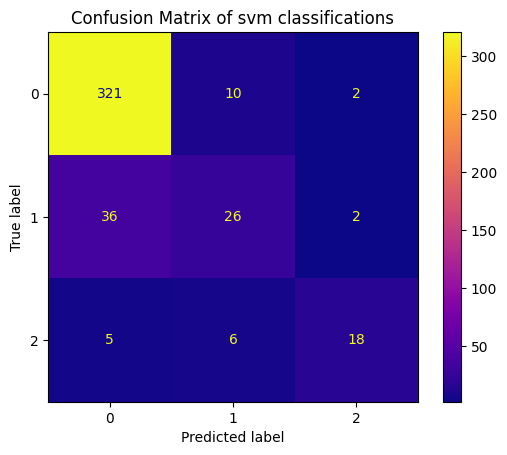

In [127]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_svm))
disp.plot(cmap="plasma")
plt.title('Confusion Matrix of svm classifications')
plt.show()

## **Train the model using K-Nearest Neighbor Algorithm (KNN)**

In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
knn_model=KNeighborsClassifier(n_neighbors=5)

In [130]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [131]:
knn_model.score(x_train,y_train)

0.9241176470588235

In [132]:
cross_val_score(knn_model,x_train,y_train,cv=5)

array([0.88823529, 0.88529412, 0.86764706, 0.91470588, 0.90882353])

In [133]:
y_pred_knn=knn_model.predict(x_test)

In [134]:
accuracy_score(y_test,y_pred_knn)

0.8732394366197183

In [135]:
f1_score(y_test,y_pred_knn,average='weighted')

0.8693011554112481

In [136]:
mean_squared_error(y_test,y_pred_knn)

0.1619718309859155

In [137]:
knn_model.fit(x_test,y_test)

KNeighborsClassifier()

In [138]:
knn_model.score(x_test,y_test)

0.8967136150234741

In [139]:
confusion_matrix(y_test,y_pred_knn)

array([[316,  16,   1],
       [ 28,  36,   0],
       [  4,   5,  20]])

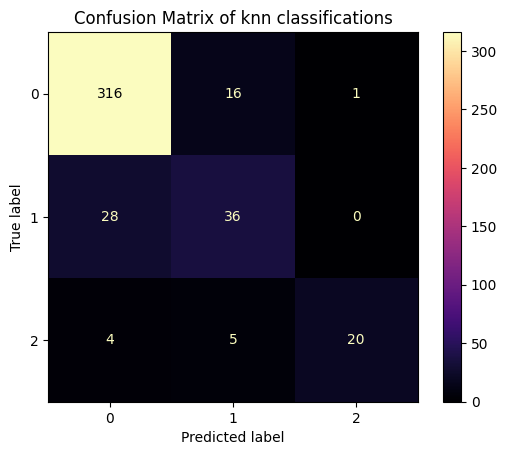

In [140]:
disp_knn = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_knn))
disp_knn.plot(cmap="magma")
plt.title('Confusion Matrix of knn classifications')
plt.show()

## **Train the model using Decision Tree**

In [141]:
from sklearn.tree import DecisionTreeClassifier

In [142]:
ds_model=DecisionTreeClassifier(random_state=42)

In [143]:
ds_model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [144]:
ds_model.score(x_train,y_train)

1.0

In [145]:
cross_val_score(ds_model,x_train,y_train,cv=5)

array([0.92647059, 0.9       , 0.89411765, 0.91764706, 0.91470588])

In [146]:
y_pred_ds=ds_model.predict(x_test)

In [147]:
accuracy_score(y_test,y_pred_ds)

0.9225352112676056

In [148]:
f1_score(y_test,y_pred_ds,average='weighted')

0.9235218354210515

In [149]:
ds_model.fit(x_test,y_test)

DecisionTreeClassifier(random_state=42)

In [150]:
ds_model.score(x_test,y_test)

0.9953051643192489

In [151]:
confusion_matrix(y_test,y_pred_ds)

array([[314,  17,   2],
       [ 12,  52,   0],
       [  2,   0,  27]])

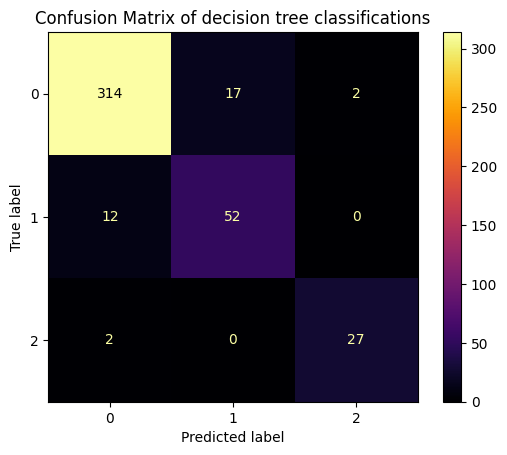

In [152]:
disp_ds = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_ds))
disp_ds.plot(cmap="inferno")
plt.title('Confusion Matrix of decision tree classifications')
plt.show()

## **Train the model using Random Forest Algorithm**

In [153]:
from sklearn.ensemble import RandomForestClassifier

In [154]:
random_forest_model=RandomForestClassifier(n_estimators=50,random_state=42)

In [155]:
random_forest_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [156]:
random_forest_model.score(x_train,y_train)

1.0

In [157]:
cross_val_score(random_forest_model,x_train,y_train,cv=5)

array([0.95      , 0.92352941, 0.92941176, 0.92941176, 0.94705882])

In [158]:
y_pred_rf=random_forest_model.predict(x_test)

In [159]:
accuracy_score(y_test,y_pred_rf)

0.9483568075117371

In [160]:
f1_score(y_test,y_pred_rf,average='weighted')

0.9473313341899245

In [161]:
mean_squared_error(y_test,y_pred_rf)

0.06572769953051644

In [162]:
random_forest_model.fit(x_test,y_test)

RandomForestClassifier(n_estimators=50, random_state=42)

In [163]:
random_forest_model.score(x_test,y_test)

0.9953051643192489

In [164]:
confusion_matrix(y_test,y_pred_rf)

array([[327,   5,   1],
       [ 12,  51,   1],
       [  1,   2,  26]])

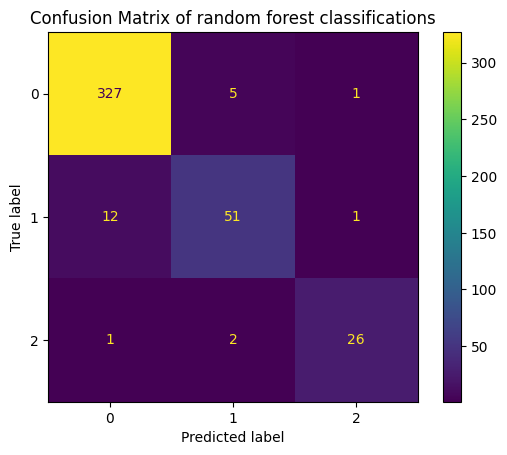

In [165]:
disp_rf = ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_rf))
disp_rf.plot(cmap="viridis")
plt.title('Confusion Matrix of random forest classifications')
plt.show()

## **Comparison of four models**

In [166]:
models = {
    'SVM': SVC(kernel='rbf', C=1.0, gamma='scale'),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}
results = []
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    results.append({
        'Algorithm': model_name,
        'Accuracy': score
    })
results_df = pd.DataFrame(results)
print(results_df)

       Algorithm  Accuracy
0            SVM  0.856808
1            KNN  0.887324
2  Decision Tree  0.922535
3  Random Forest  0.946009


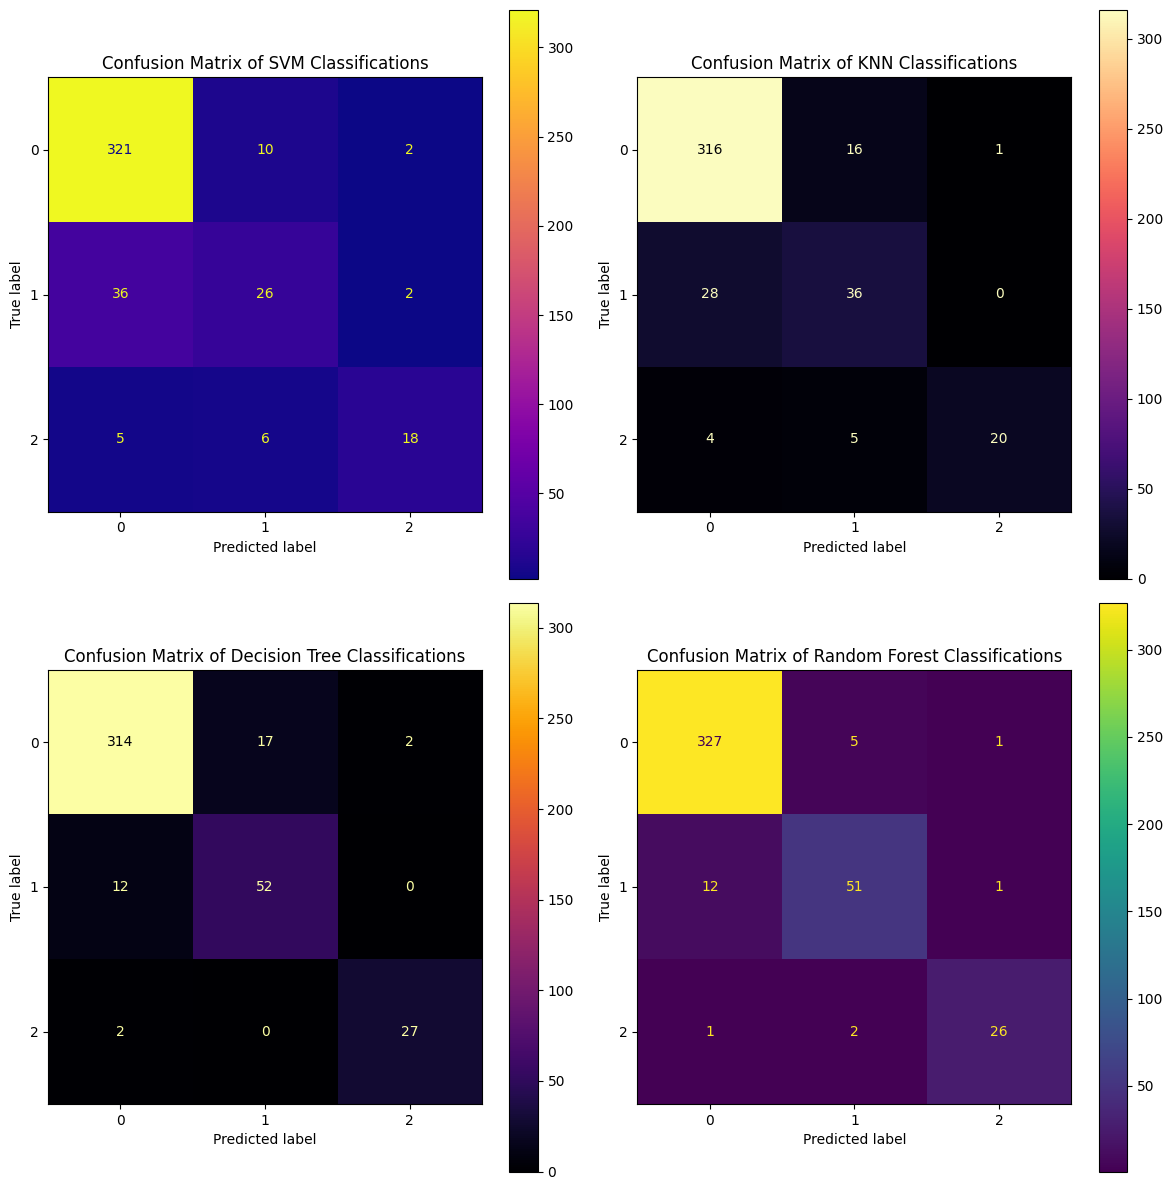

In [168]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()
models = [
    ('SVM', y_pred_svm, "plasma", axes[0]),
    ('KNN', y_pred_knn, "magma", axes[1]),
    ('Decision Tree', y_pred_ds, "inferno", axes[2]),
    ('Random Forest', y_pred_rf, "viridis", axes[3])
]
for i, (model_name, y_pred, cmap, ax) in enumerate(models):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=cmap, ax=ax, values_format='d')
    ax.set_title(f'Confusion Matrix of {model_name} Classifications')
plt.tight_layout()
plt.show()


##**Summarization**

**1-Libraries and Data Loading**

Important libraries such as pandas, NumPy, matplotlib, seaborn, and scikit-learn are imported.
The dataset for fetal health classification is loaded and inspected.

**2-Exploratory Data Analysis (EDA)**

Data structure is examined, including column names and basic statistics.
Visualizations (likely using matplotlib or seaborn) are used to analyze data distributions and relationships.
Analysis includes features that contribute to classifying fetal health conditions.

**3-Data Preprocessing**

Handling missing values, normalizing, or scaling data for model compatibility.
Addressing class imbalances, if any, using methods like oversampling or undersampling.

**4-Modeling**

Multiple classification models, including decision trees, random forests, logistic regression, or neural networks, are implemented.
Cross-validation is used to evaluate model performance.

**5-Evaluation**

Performance metrics such as accuracy, precision, recall, F1-score, and confusion matrix are calculated.
ROC-AUC is visualized to measure classification effectiveness.

**6-Feature Importance**

Feature importance scores are likely visualized for tree-based models.
Insights about which factors significantly impact fetal health.

**7-Conclusion**

A summary of findings and recommendations based on model outcomes.